<a href="https://colab.research.google.com/github/dborgesm/Banking-Analytics/blob/master/Normalizing_the_data_using_WOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight of Evidence and Information Value

In [0]:

#Installing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!gdown https://drive.google.com/uc?id=19tu2dEmP9aDPcclvrYh5gAdDRf0ux_0W


Downloading...
From: https://drive.google.com/uc?id=19tu2dEmP9aDPcclvrYh5gAdDRf0ux_0W
To: /content/as_data.csv
445MB [00:02, 149MB/s]


In [0]:
data = pd.read_csv("/content/as_data.csv")

In [0]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 4.4MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.1.1-cp36-none-any.whl size=58169 sha256=4f2c241dfd5d3b8045e9957e7e60e62083e55657e8c8af3f4765bc35b1cad670
  Stored in directory: /root/.cache/pip/wheels/8f/4c/98/567ff70984acd88ffae211d8fc209e34b98fb43ff27f09fdd3
Successfully built scorecardpy


In [0]:
import scorecardpy as sc

In [0]:
# Separating the training and test data
train, test = sc.split_df(data,
                          y = 'default',
                          ratio = 0.7, seed = 251082976).values()

In [0]:
# Eliminating the indeterminates in the training set, however they will remaing in the test set
indeterminate = train[train.loan_status == "Late (31-120 days)"].index
train.drop(indeterminate, inplace=True)

In [0]:
# We will look at the bins separately
train1 = train.iloc[:, :20]
train1["default"] = train["default"]

In [0]:
bins1 = sc.woebin(train1, y = 'default', 
                 min_perc_fine_bin=0.05, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=50, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1343093 rows and 21 columns in 00:02:12


{'annual_inc': <Figure size 432x288 with 2 Axes>,
 'delinq_2yrs': <Figure size 432x288 with 2 Axes>,
 'dti': <Figure size 432x288 with 2 Axes>,
 'emp_length': <Figure size 432x288 with 2 Axes>,
 'home_ownership': <Figure size 432x288 with 2 Axes>,
 'il_util': <Figure size 432x288 with 2 Axes>,
 'initial_list_status': <Figure size 432x288 with 2 Axes>,
 'inq_last_6mths': <Figure size 432x288 with 2 Axes>,
 'int_rate': <Figure size 432x288 with 2 Axes>,
 'loan_status': <Figure size 432x288 with 2 Axes>,
 'max_bal_bc': <Figure size 432x288 with 2 Axes>,
 'mths_since_last_major_derog': <Figure size 432x288 with 2 Axes>,
 'mths_since_rcnt_il': <Figure size 432x288 with 2 Axes>,
 'open_act_il': <Figure size 432x288 with 2 Axes>,
 'open_il_12m': <Figure size 432x288 with 2 Axes>,
 'pub_rec': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'term': <Figure size 432x288 with 2 Axes>,
 'tot_coll_amt': <Figure size 432x288 with 2 Axes>,
 'zip_code': <Figure size 

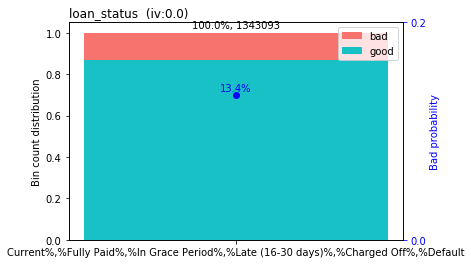

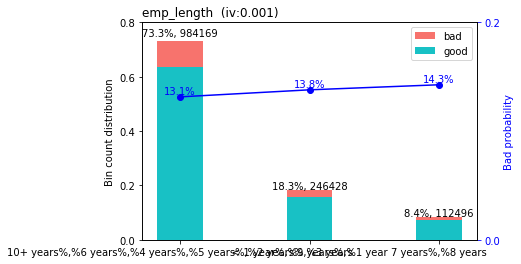

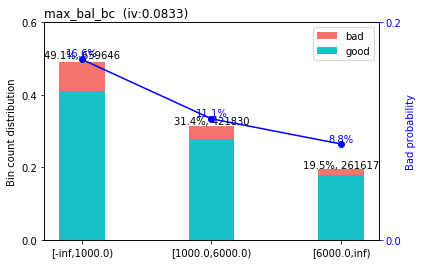

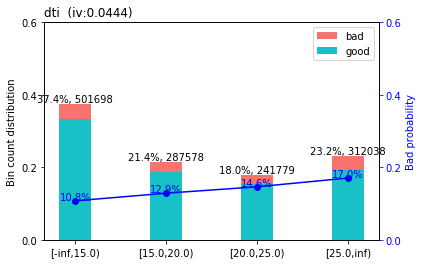

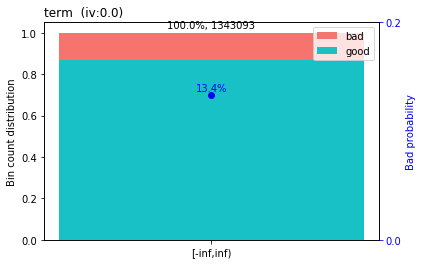

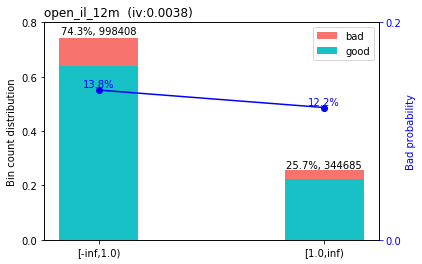

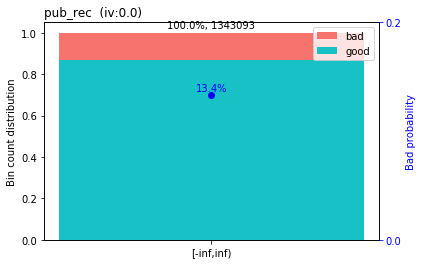

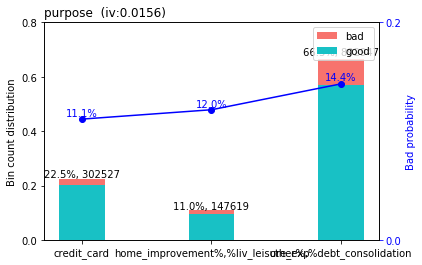

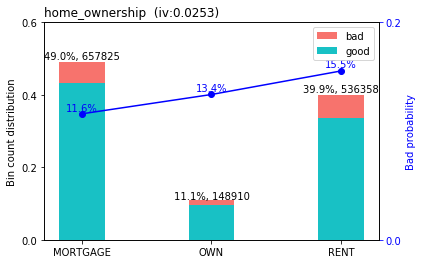

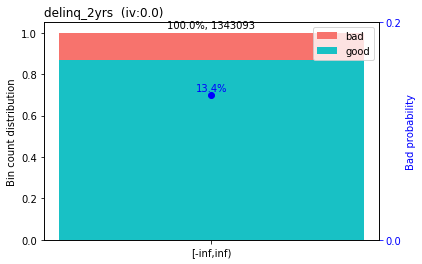

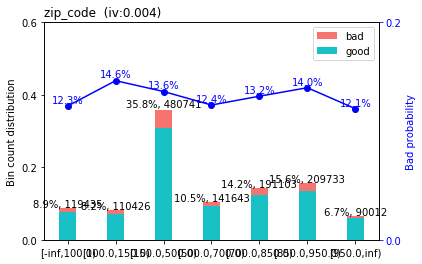

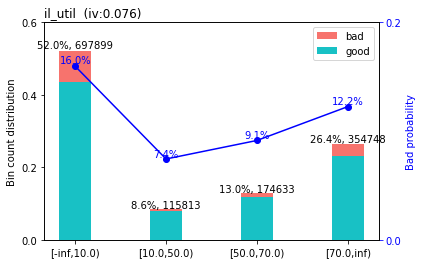

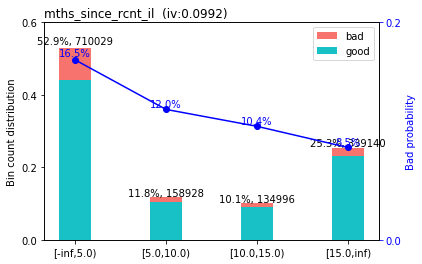

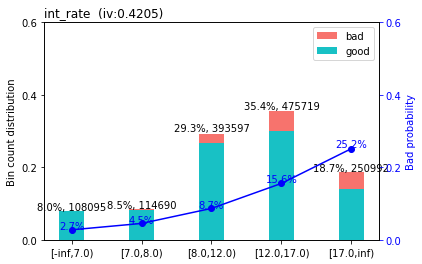

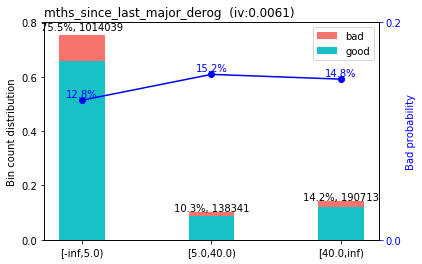

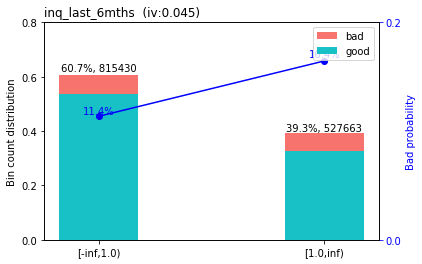

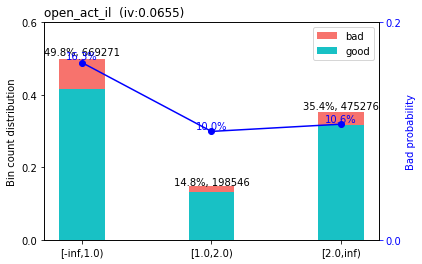

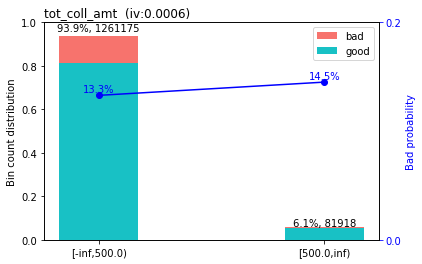

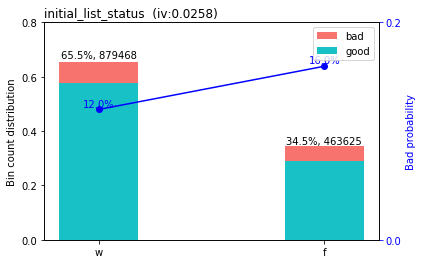

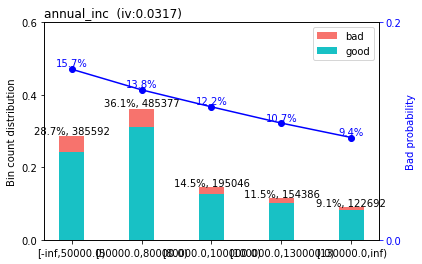

In [0]:
sc.woebin_plot(bins1)

-------- 1/6 annual_inc --------
>>> dt[annual_inc].describe(): 
count    1.343093e+06
mean     7.390898e+04
std      4.034086e+04
min      0.000000e+00
25%      4.589200e+04
50%      6.500000e+04
75%      9.000000e+04
max      2.995720e+05
Name: annual_inc, dtype: float64 



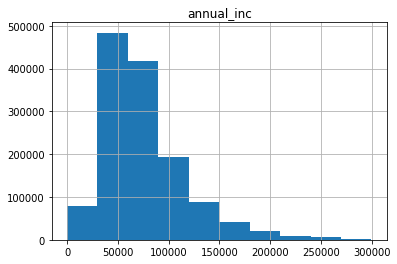

>>> Current breaks:
50000.0,80000.0,100000.0,130000.0 



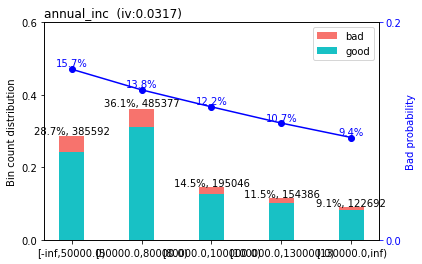

>>> Adjust breaks for (1/6) annual_inc?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/6 emp_length --------
>>> dt[emp_length].describe(): 
count       1343093
unique           11
top       10+ years
freq         527796
Name: emp_length, dtype: object 

>>> dt[emp_length].value_counts(): 
10+ years    527796
2 years      121929
< 1 year     108817
3 years      107993
1 year        88283
5 years       83537
4 years       81301
6 years       61613
7 years       56287
8 years       56209
9 years       49328
Name: emp_length, dtype: int64 

>>> Current breaks:
'10+ years%,%6 years%,%4 years%,%5 years%,%2 years%,%3 years','< 1 year%,%9 years%,%1 year','7 years%,%8 years' 



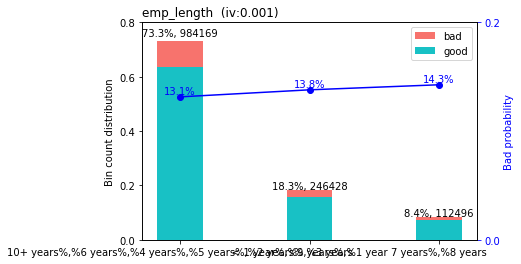

>>> Adjust breaks for (2/6) emp_length?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/6 il_util --------
>>> dt[il_util].describe(): 
count    1.343093e+06
mean     3.367079e+01
std      3.816414e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.100000e+01
max      2.000000e+02
Name: il_util, dtype: float64 



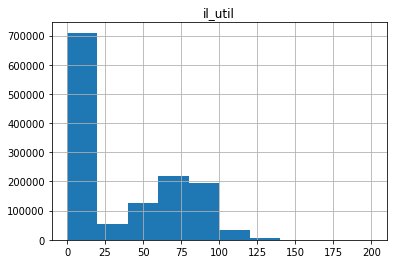

>>> Current breaks:
10.0,50.0,70.0 



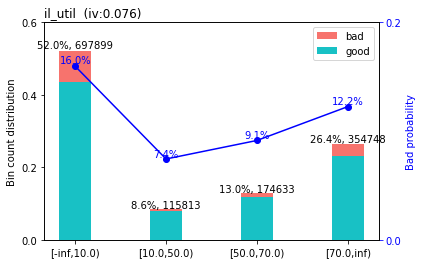

>>> Adjust breaks for (3/6) il_util?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 1,60,80
[INFO] creating woe binning ...
Binning on 1343093 rows and 2 columns in 00:00:12
>>> Current breaks:
80.0, 1.0, 60.0 



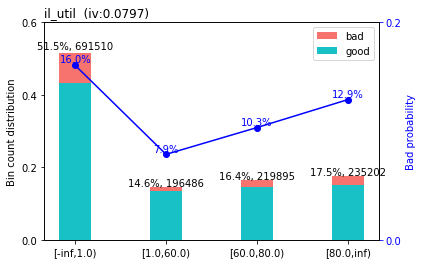

>>> Adjust breaks for (3/6) il_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/6 int_rate --------
>>> dt[int_rate].describe(): 
count    1.343093e+06
mean     1.308479e+01
std      4.777642e+00
min      5.310000e+00
25%      9.580000e+00
50%      1.262000e+01
75%      1.580000e+01
max      3.099000e+01
Name: int_rate, dtype: float64 



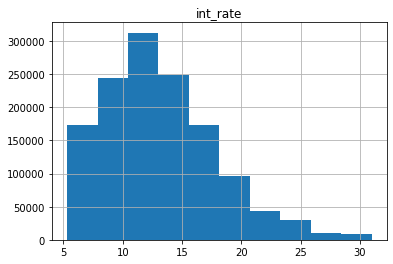

>>> Current breaks:
7.0,8.0,12.0,17.0 



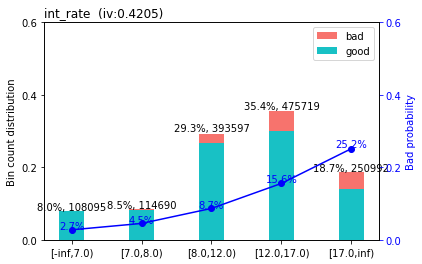

>>> Adjust breaks for (4/6) int_rate?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 12,15,17
[INFO] creating woe binning ...
Binning on 1343093 rows and 2 columns in 00:00:12
>>> Current breaks:
17.0, 12.0, 15.0 



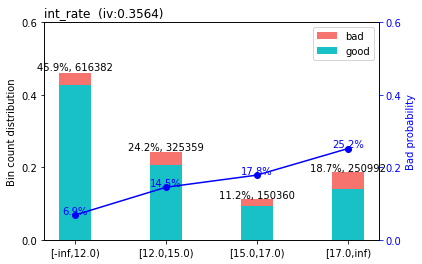

>>> Adjust breaks for (4/6) int_rate?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/6 open_act_il --------
>>> dt[open_act_il].describe(): 
count    1.343093e+06
mean     1.321408e+00
std      1.733481e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: open_act_il, dtype: float64 

>>> dt[open_act_il].value_counts(): 
0.0    669271
1.0    198546
2.0    185060
3.0    115484
4.0     94368
6.0     80364
Name: open_act_il, dtype: int64 

>>> Current breaks:
1.0,2.0 



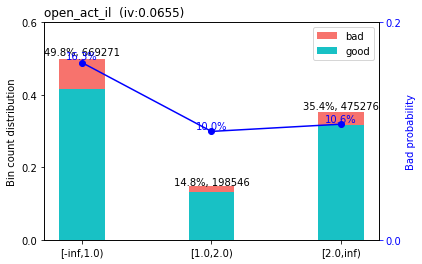

>>> Adjust breaks for (5/6) open_act_il?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 1,2,4,5
[INFO] creating woe binning ...
Binning on 1343093 rows and 2 columns in 00:00:13
>>> Current breaks:
2.0, 1.0, 5.0, 4.0 



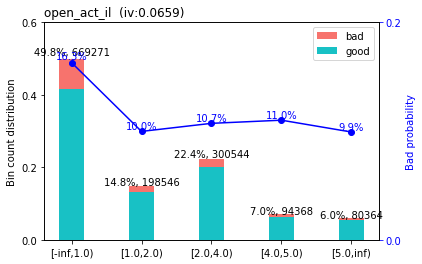

>>> Adjust breaks for (5/6) open_act_il?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/6 zip_code --------
>>> dt[zip_code].describe(): 
count    1.343093e+06
mean     5.100527e+02
std      3.110884e+02
min      7.000000e+00
25%      2.310000e+02
50%      4.730000e+02
75%      8.010000e+02
max      9.990000e+02
Name: zip_code, dtype: float64 



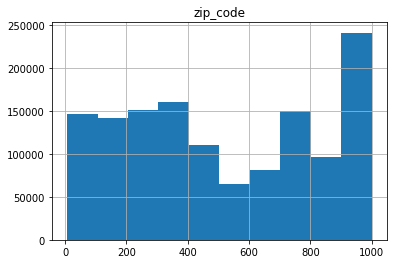

>>> Current breaks:
100.0,150.0,500.0,700.0,850.0,950.0 



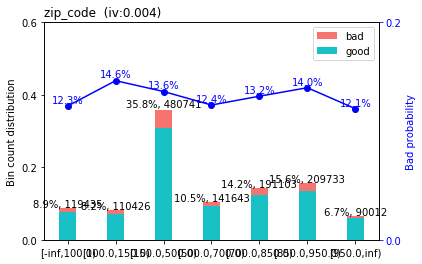

>>> Adjust breaks for (6/6) zip_code?
1: next 
2: yes 
3: back
Selection: 1


In [0]:
breaks_adj = sc.woebin_adj(train1, "default", bins1)

In [0]:
train2 = train.iloc[:, 20:]

In [0]:
bins2 = sc.woebin(train2, y = 'default', 
                 min_perc_fine_bin=0.05, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=50, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...
Binning on 1343093 rows and 25 columns in 00:03:09


/usr/local/lib/python3.6/dist-packages/scorecardpy/woebin.py:1184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


{'acc_open_past_24mths': <Figure size 432x288 with 2 Axes>,
 'addr_region': <Figure size 432x288 with 2 Axes>,
 'all_util': <Figure size 432x288 with 2 Axes>,
 'bc_open_to_buy': <Figure size 432x288 with 2 Axes>,
 'inq_fi': <Figure size 432x288 with 2 Axes>,
 'inq_last_12m': <Figure size 432x288 with 2 Axes>,
 'mo_sin_old_il_acct': <Figure size 432x288 with 2 Axes>,
 'mo_sin_old_rev_tl_op': <Figure size 432x288 with 2 Axes>,
 'mo_sin_rcnt_rev_tl_op': <Figure size 432x288 with 2 Axes>,
 'mo_sin_rcnt_tl': <Figure size 432x288 with 2 Axes>,
 'mort_acc': <Figure size 432x288 with 2 Axes>,
 'mths_since_recent_bc': <Figure size 432x288 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 432x288 with 2 Axes>,
 'num_accts_ever_120_pd': <Figure size 432x288 with 2 Axes>,
 'num_actv_rev_tl': <Figure size 432x288 with 2 Axes>,
 'num_il_tl': <Figure size 432x288 with 2 Axes>,
 'num_rev_accts': <Figure size 432x288 with 2 Axes>,
 'num_tl_90g_dpd_24m': <Figure size 432x288 with 2 Axes>,
 'pct_tl_nv

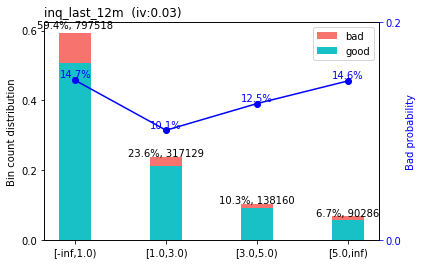

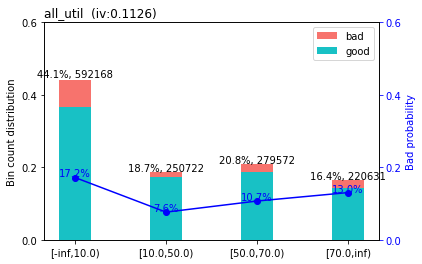

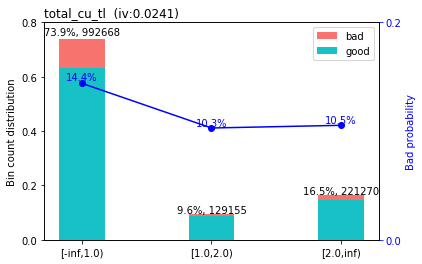

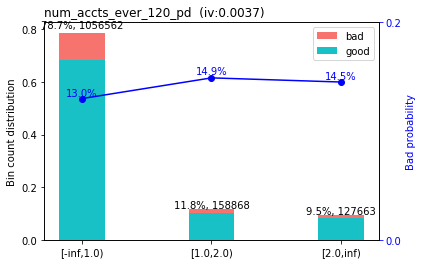

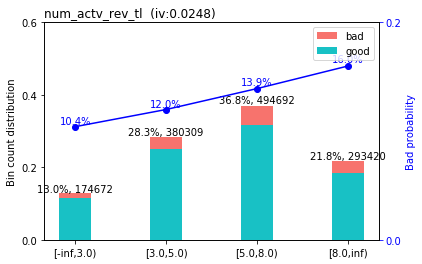

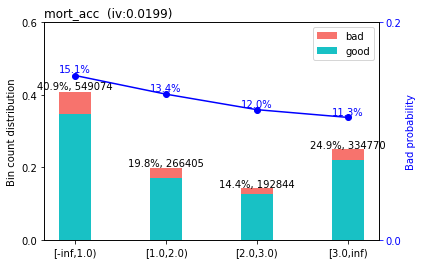

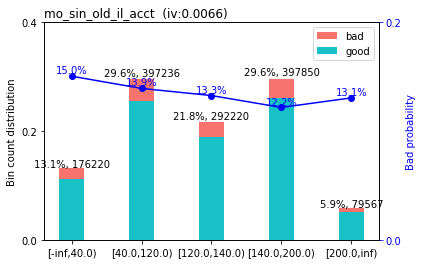

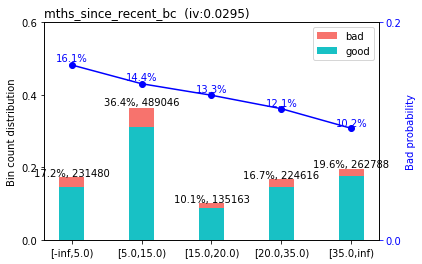

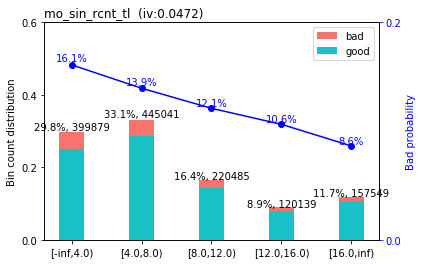

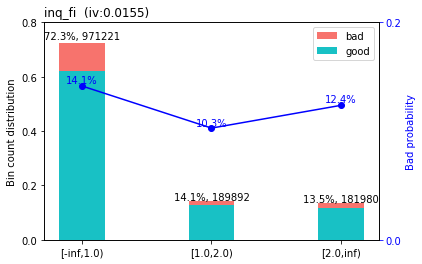

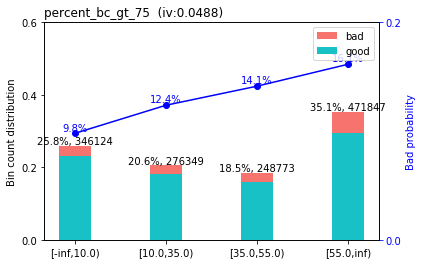

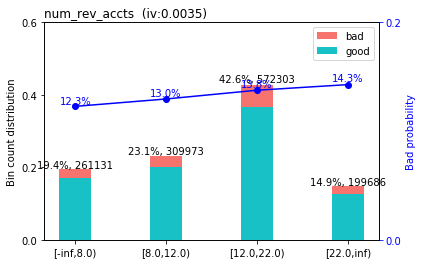

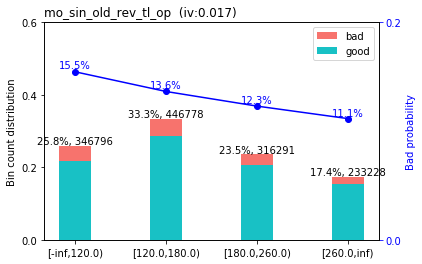

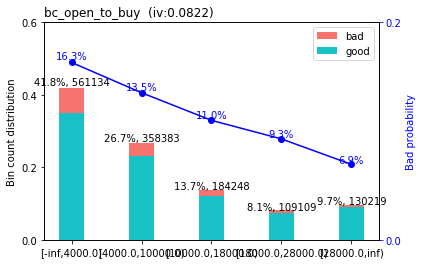

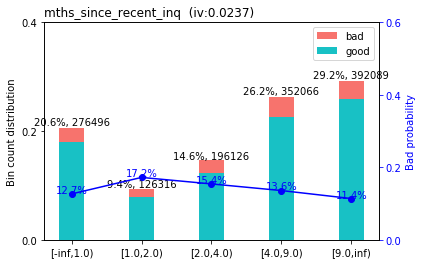

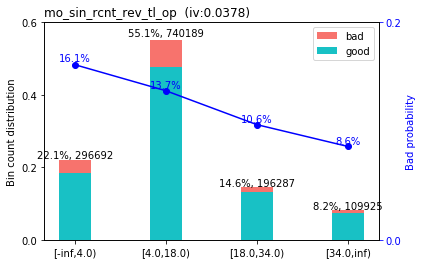

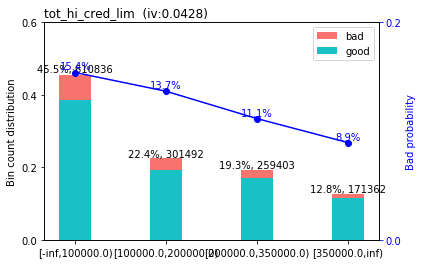

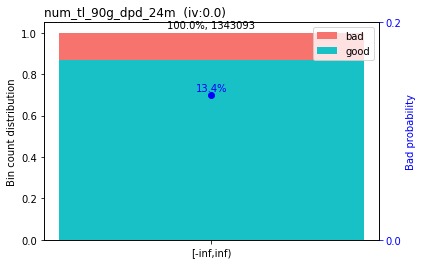

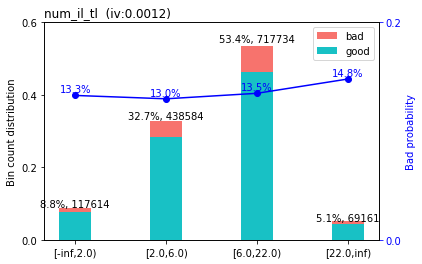

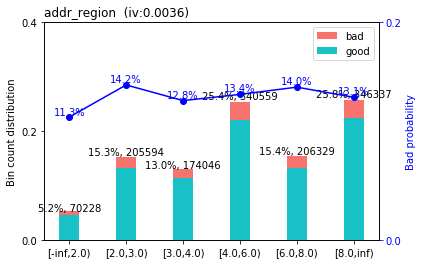

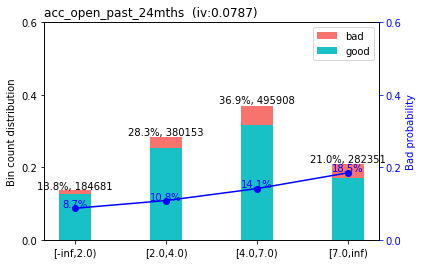

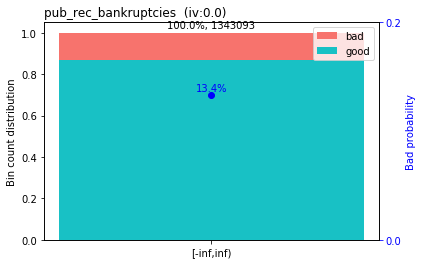

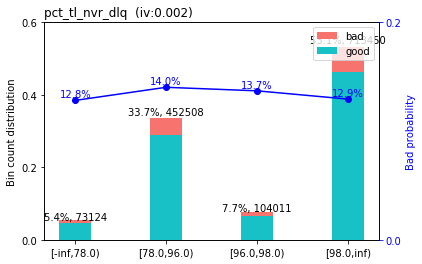

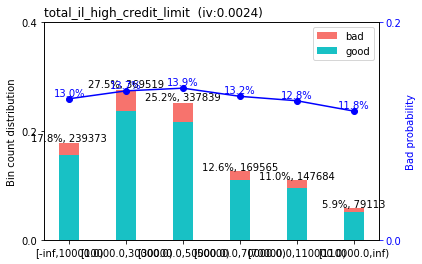

In [0]:
sc.woebin_plot(bins2)

-------- 1/20 acc_open_past_24mths --------
>>> dt[acc_open_past_24mths].describe(): 
count    1.343093e+06
mean     4.485779e+00
std      3.005406e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      2.500000e+01
Name: acc_open_past_24mths, dtype: float64 



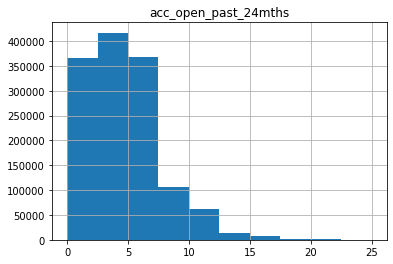

>>> Current breaks:
2.0,4.0,7.0 



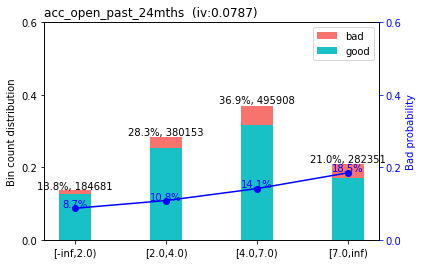

>>> Adjust breaks for (1/20) acc_open_past_24mths?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/20 addr_region --------
>>> dt[addr_region].describe(): 
count    1.343093e+06
mean     5.240525e+00
std      2.605011e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      9.000000e+00
Name: addr_region, dtype: float64 

>>> dt[addr_region].value_counts(): 
5    274631
9    241076
2    205594
3    174046
7    148345
8    105261
1     70228
4     65928
6     57984
Name: addr_region, dtype: int64 

>>> Current breaks:
2.0,3.0,4.0,6.0,8.0 



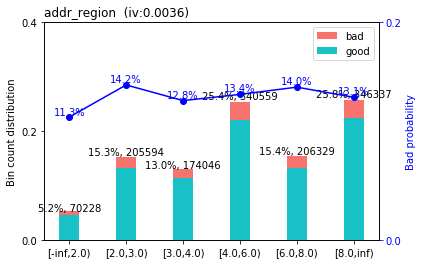

>>> Adjust breaks for (2/20) addr_region?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/20 all_util --------
>>> dt[all_util].describe(): 
count    1.343093e+06
mean     3.244443e+01
std      3.232651e+01
min      0.000000e+00
25%      0.000000e+00
50%      3.200000e+01
75%      6.100000e+01
max      1.770000e+02
Name: all_util, dtype: float64 



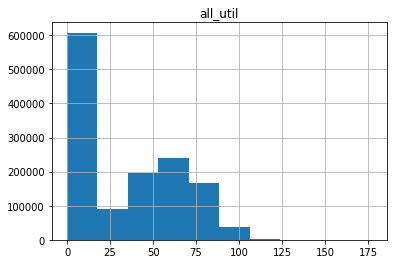

>>> Current breaks:
10.0,50.0,70.0 



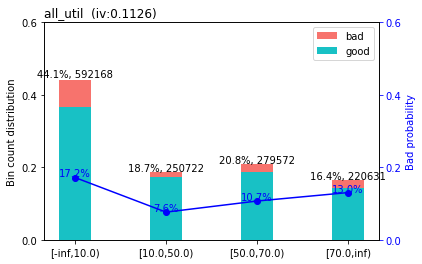

>>> Adjust breaks for (3/20) all_util?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 4,40,60
[INFO] creating woe binning ...
Binning on 1343093 rows and 2 columns in 00:00:12
>>> Current breaks:
40.0, 60.0, 4.0 



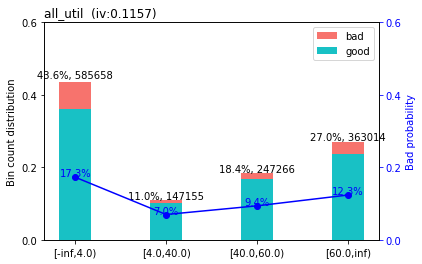

>>> Adjust breaks for (3/20) all_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/20 bc_open_to_buy --------
>>> dt[bc_open_to_buy].describe(): 
count    1.343093e+06
mean     1.066813e+04
std      1.542242e+04
min      0.000000e+00
25%      1.732000e+03
50%      5.176000e+03
75%      1.304800e+04
max      2.498690e+05
Name: bc_open_to_buy, dtype: float64 



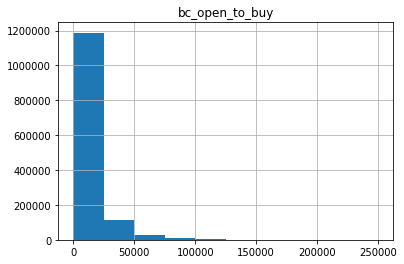

>>> Current breaks:
4000.0,10000.0,18000.0,28000.0 



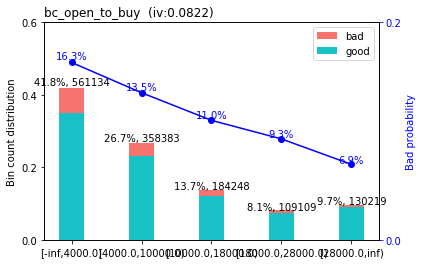

>>> Adjust breaks for (4/20) bc_open_to_buy?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 4000,10000,18000,29000
[INFO] creating woe binning ...
Binning on 1343093 rows and 2 columns in 00:00:13
>>> Current breaks:
29000.0, 18000.0, 4000.0, 10000.0 



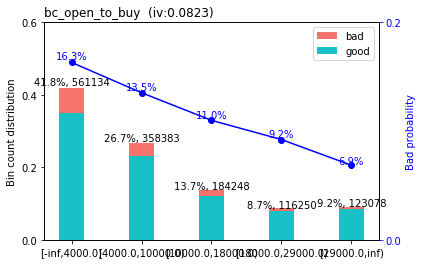

>>> Adjust breaks for (4/20) bc_open_to_buy?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/20 inq_fi --------
>>> dt[inq_fi].describe(): 
count    1.343093e+06
mean     4.788656e-01
std      8.868599e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: inq_fi, dtype: float64 

>>> dt[inq_fi].value_counts(): 
0.0    971221
1.0    189892
2.0     92671
3.0     89309
Name: inq_fi, dtype: int64 

>>> Current breaks:
1.0,2.0 



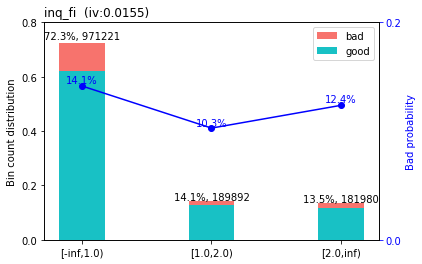

>>> Adjust breaks for (5/20) inq_fi?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/20 mo_sin_old_il_acct --------
>>> dt[mo_sin_old_il_acct].describe(): 
count    1.343093e+06
mean     1.167209e+02
std      5.929088e+01
min      0.000000e+00
25%      8.200000e+01
50%      1.260000e+02
75%      1.510000e+02
max      4.000000e+02
Name: mo_sin_old_il_acct, dtype: float64 



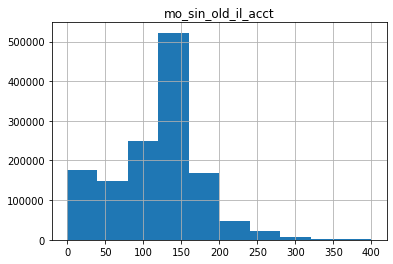

>>> Current breaks:
40.0,120.0,140.0,200.0 



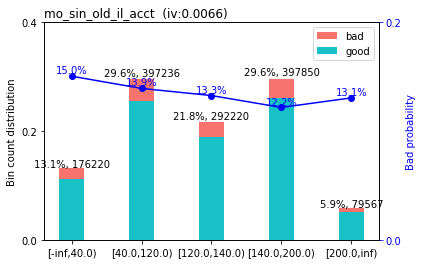

>>> Adjust breaks for (6/20) mo_sin_old_il_acct?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/20 mo_sin_rcnt_rev_tl_op --------
>>> dt[mo_sin_rcnt_rev_tl_op].describe(): 
count    1.343093e+06
mean     1.321822e+01
std      1.540147e+01
min      0.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.600000e+01
max      1.400000e+02
Name: mo_sin_rcnt_rev_tl_op, dtype: float64 



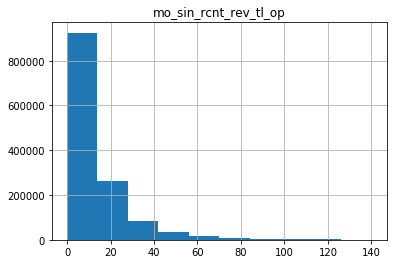

>>> Current breaks:
4.0,18.0,34.0 



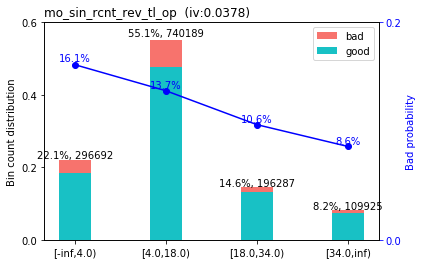

>>> Adjust breaks for (7/20) mo_sin_rcnt_rev_tl_op?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/20 mo_sin_rcnt_tl --------
>>> dt[mo_sin_rcnt_tl].describe(): 
count    1.343093e+06
mean     7.981141e+00
std      7.822873e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      7.500000e+01
Name: mo_sin_rcnt_tl, dtype: float64 



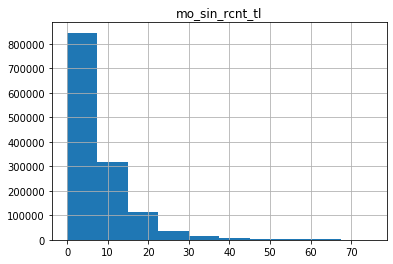

>>> Current breaks:
4.0,8.0,12.0,16.0 



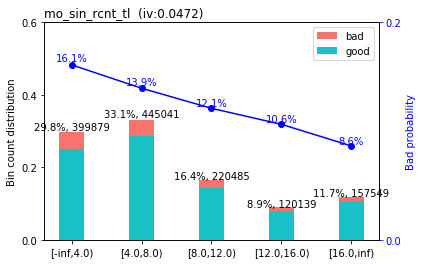

>>> Adjust breaks for (8/20) mo_sin_rcnt_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/20 mort_acc --------
>>> dt[mort_acc].describe(): 
count    1.343093e+06
mean     1.534099e+00
std      1.825579e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.000000e+01
Name: mort_acc, dtype: float64 



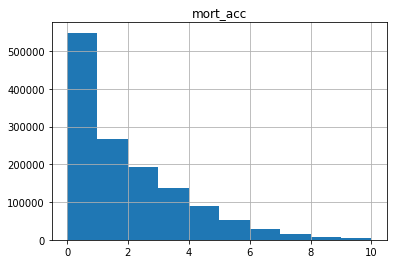

>>> Current breaks:
1.0,2.0,3.0 



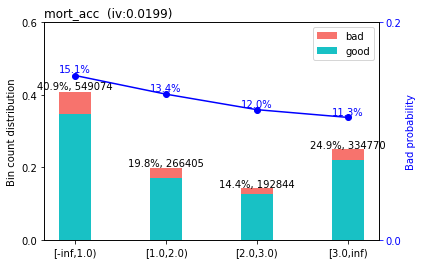

>>> Adjust breaks for (9/20) mort_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/20 mths_since_recent_bc --------
>>> dt[mths_since_recent_bc].describe(): 
count    1.343093e+06
mean     2.300215e+01
std      2.661246e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.400000e+01
75%      2.800000e+01
max      1.750000e+02
Name: mths_since_recent_bc, dtype: float64 



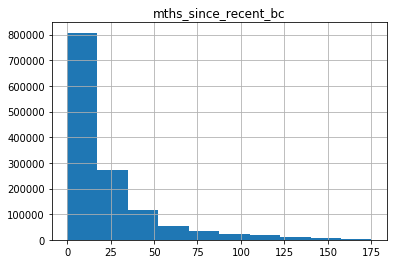

>>> Current breaks:
5.0,15.0,20.0,35.0 



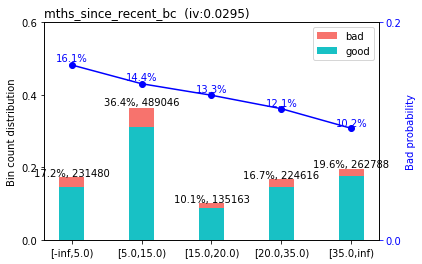

>>> Adjust breaks for (10/20) mths_since_recent_bc?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/20 mths_since_recent_inq --------
>>> dt[mths_since_recent_inq].describe(): 
count    1.343093e+06
mean     6.101623e+00
std      6.042703e+00
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.000000e+01
max      2.500000e+01
Name: mths_since_recent_inq, dtype: float64 



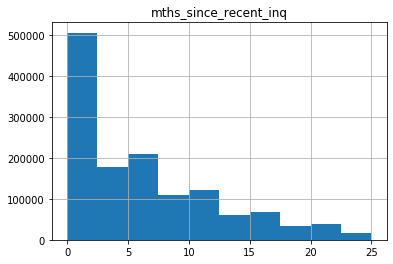

>>> Current breaks:
1.0,2.0,4.0,9.0 



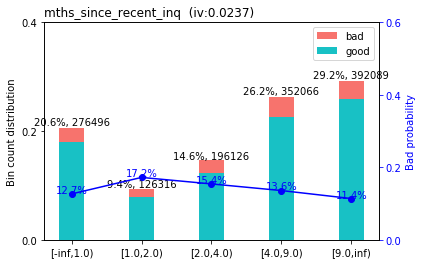

>>> Adjust breaks for (11/20) mths_since_recent_inq?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/20 num_accts_ever_120_pd --------
>>> dt[num_accts_ever_120_pd].describe(): 
count    1.343093e+06
mean     4.215322e-01
std      1.078376e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: num_accts_ever_120_pd, dtype: float64 



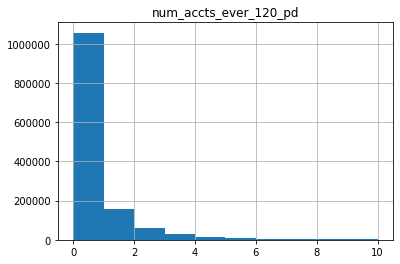

>>> Current breaks:
1.0,2.0 



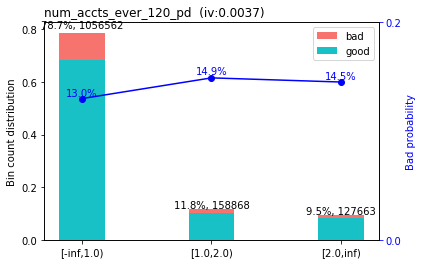

>>> Adjust breaks for (12/20) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/20 num_actv_rev_tl --------
>>> dt[num_actv_rev_tl].describe(): 
count    1.343093e+06
mean     5.586735e+00
std      3.127760e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      2.000000e+01
Name: num_actv_rev_tl, dtype: float64 



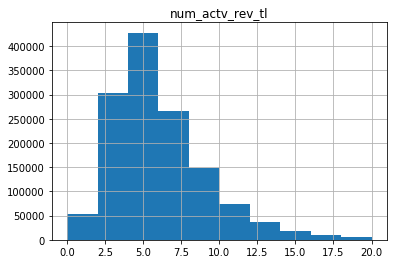

>>> Current breaks:
3.0,5.0,8.0 



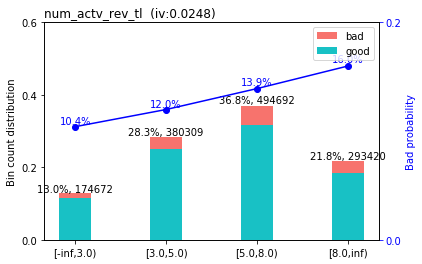

>>> Adjust breaks for (13/20) num_actv_rev_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/20 num_il_tl --------
>>> dt[num_il_tl].describe(): 
count    1.343093e+06
mean     8.127851e+00
std      6.680158e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      4.500000e+01
Name: num_il_tl, dtype: float64 



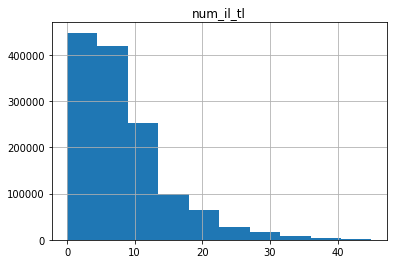

>>> Current breaks:
2.0,6.0,22.0 



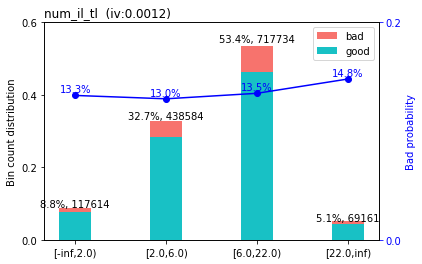

>>> Adjust breaks for (14/20) num_il_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/20 num_rev_accts --------
>>> dt[num_rev_accts].describe(): 
count    1.343093e+06
mean     1.396101e+01
std      7.544020e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      1.800000e+01
max      5.000000e+01
Name: num_rev_accts, dtype: float64 



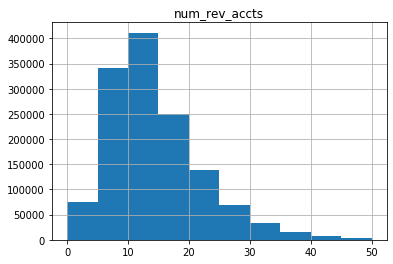

>>> Current breaks:
8.0,12.0,22.0 



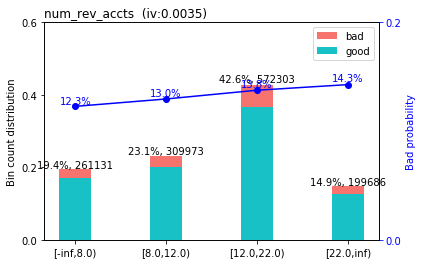

>>> Adjust breaks for (15/20) num_rev_accts?
1: next 
2: yes 
3: back
Selection: 1
-------- 16/20 pct_tl_nvr_dlq --------
>>> dt[pct_tl_nvr_dlq].describe(): 
count    1.343093e+06
mean     9.467819e+01
std      7.814741e+00
min      6.000000e+01
25%      9.200000e+01
50%      9.840000e+01
75%      1.000000e+02
max      1.000000e+02
Name: pct_tl_nvr_dlq, dtype: float64 



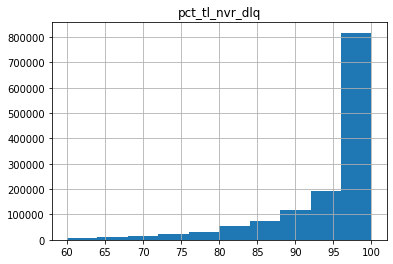

>>> Current breaks:
78.0,96.0,98.0 



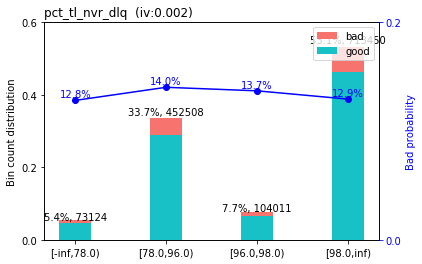

>>> Adjust breaks for (16/20) pct_tl_nvr_dlq?
1: next 
2: yes 
3: back
Selection: 1
-------- 17/20 percent_bc_gt_75 --------
>>> dt[percent_bc_gt_75].describe(): 
count    1.343093e+06
mean     4.340812e+01
std      3.551671e+01
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+01
75%      7.140000e+01
max      1.000000e+02
Name: percent_bc_gt_75, dtype: float64 



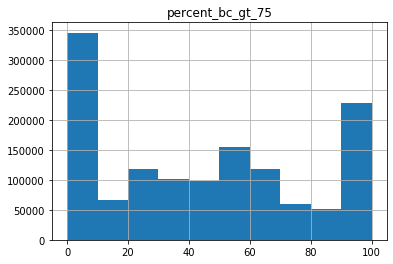

>>> Current breaks:
10.0,35.0,55.0 



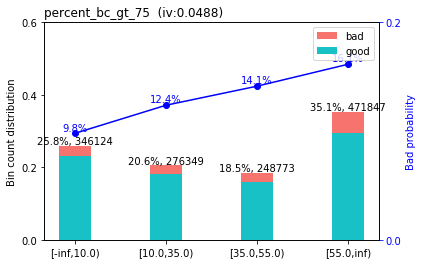

>>> Adjust breaks for (17/20) percent_bc_gt_75?
1: next 
2: yes 
3: back
Selection: 1
-------- 18/20 tot_hi_cred_lim --------
>>> dt[tot_hi_cred_lim].describe(): 
count    1.343093e+06
mean     1.684151e+05
std      1.572010e+05
min      0.000000e+00
25%      5.154200e+04
50%      1.138760e+05
75%      2.447910e+05
max      1.199030e+06
Name: tot_hi_cred_lim, dtype: float64 



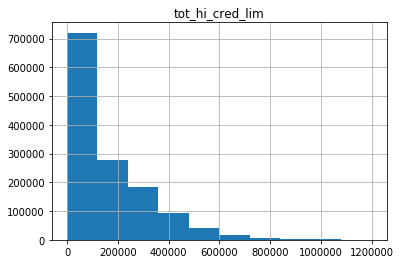

>>> Current breaks:
100000.0,200000.0,350000.0 



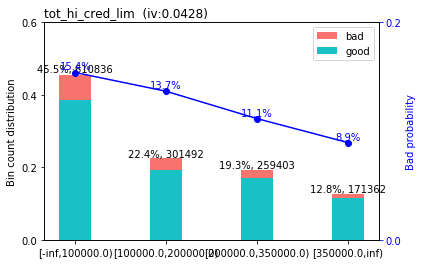

>>> Adjust breaks for (18/20) tot_hi_cred_lim?
1: next 
2: yes 
3: back
Selection: 1
-------- 19/20 total_cu_tl --------
>>> dt[total_cu_tl].describe(): 
count    1.343093e+06
mean     5.040142e-01
std      9.449405e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: total_cu_tl, dtype: float64 

>>> dt[total_cu_tl].value_counts(): 
0.0    992668
1.0    129155
2.0    116027
3.0    105243
Name: total_cu_tl, dtype: int64 

>>> Current breaks:
1.0,2.0 



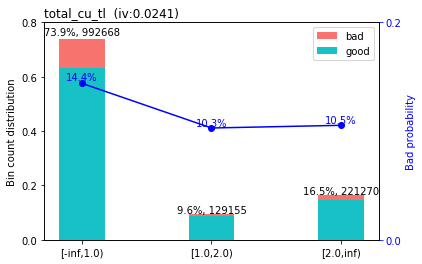

>>> Adjust breaks for (19/20) total_cu_tl?
1: next 
2: yes 
3: back
Selection: 1
-------- 20/20 total_il_high_credit_limit --------
>>> dt[total_il_high_credit_limit].describe(): 
count    1.343093e+06
mean     4.142800e+04
std      3.884845e+04
min      0.000000e+00
25%      1.550000e+04
50%      3.252200e+04
75%      5.591100e+04
max      2.999380e+05
Name: total_il_high_credit_limit, dtype: float64 



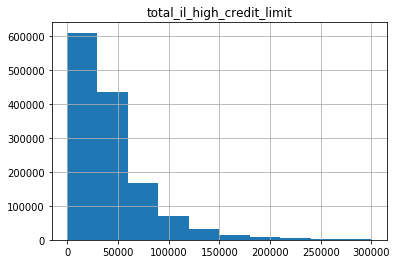

>>> Current breaks:
10000.0,30000.0,50000.0,70000.0,110000.0 



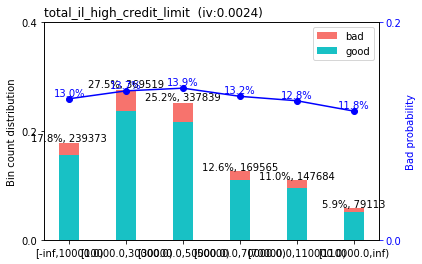

>>> Adjust breaks for (20/20) total_il_high_credit_limit?
1: next 
2: yes 
3: back
Selection: 1


In [0]:
breaks_adj2 = sc.woebin_adj(train2, "default", bins2)

## Final variables and chosen breaks

**all_util:** 4,40,60

**il_util:** 1,60,80

**max_bal_bc:** 500,6500, 0.0919

**mths_since_rcnt_il:** 1,7,15

**bc_open_to_buy:** 0.0808, 4000,10000,18000,29000

**int_rate:** 12,15,17

**acc_open_past_24mths** (0.0775):2, 4, 7 



In [0]:
ba2 = {'acc_open_past_24mths': [2.0,4.0,7.0], 'addr_region': [2.0,3.0,4.0,8.0], 'all_util': [4,40,60], 'bc_open_to_buy': [4000,10000,18000,29000], 'inq_fi': [1.0,2.0], 'inq_last_12m': [1.0,3.0,5.0], 'mo_sin_old_il_acct': [40.0,120.0,140.0,200.0], 'mo_sin_old_rev_tl_op': [120.0,180.0,260.0], 'mo_sin_rcnt_rev_tl_op': [4.0,18.0,34.0], 'mo_sin_rcnt_tl': [4.0,8.0,12.0,16.0], 'mort_acc': [1.0,2.0,3.0], 'mths_since_recent_bc': [5.0,15.0,20.0,35.0], 'mths_since_recent_inq': [1.0,2.0,4.0,9.0], 'num_accts_ever_120_pd': [1.0,2.0], 'num_actv_rev_tl': [3.0,5.0,8.0], 'num_il_tl': [2.0,6.0,22.0], 'num_rev_accts': [8.0,12.0,22.0], 'pct_tl_nvr_dlq': [78.0,96.0,98.0], 'percent_bc_gt_75': [10.0,35.0,55.0], 'tot_hi_cred_lim': [100000.0,200000.0,350000.0], 'total_cu_tl': [1.0,2.0], 'total_il_high_credit_limit': [10000.0,30000.0,50000.0,70000.0,110000.0]}
ba1 = {'annual_inc': [50000.0,80000.0,100000.0,130000.0], 'dti': [15.0,20.0,25.0], 'emp_length': ['10+ years%,%4 years%,%6 years','5 years%,%2 years%,%3 years','< 1 year%,%9 years%,%1 year','7 years%,%8 years'], 'home_ownership': ['MORTGAGE','OWN','RENT'], 'il_util': [1,60,80], 'initial_list_status': ['w','f'], 'inq_last_6mths': [1.0], 'int_rate': [12,15,17], 'loan_status': ['Current%,%Fully Paid%,%In Grace Period%,%Late (16-30 days)%,%Late (31-120 days)%,%Charged Off%,%Default'], 'max_bal_bc': [500.0,6500.0], 'mths_since_last_major_derog': [5.0,40.0], 'mths_since_rcnt_il': [5.0,10.0,15.0], 'open_act_il': [1,3,5], 'open_il_12m': [1.0], 'purpose': ['credit_card','home_improvement%,%liv_leisure_exp','other%,%debt_consolidation'], 'tot_coll_amt': [500.0], 'zip_code': [100,300,500]}

In [0]:
# breaks to be passed to sc.woebin
ba3 = "{'acc_open_past_24mths': [2.0,4.0,7.0], 'addr_region': [2.0,3.0,4.0,8.0], 'all_util': [4,40,60], 'bc_open_to_buy': [4000,10000,18000,29000], 'inq_fi': [1.0,2.0], 'inq_last_12m': [1.0,3.0,5.0], 'mo_sin_old_il_acct': [40.0,120.0,140.0,200.0], 'mo_sin_old_rev_tl_op': [120.0,180.0,260.0], 'mo_sin_rcnt_rev_tl_op': [4.0,18.0,34.0], 'mo_sin_rcnt_tl': [4.0,8.0,12.0,16.0], 'mort_acc': [1.0,2.0,3.0], 'mths_since_recent_bc': [5.0,15.0,20.0,35.0], 'mths_since_recent_inq': [1.0,2.0,4.0,9.0], 'num_accts_ever_120_pd': [1.0,2.0], 'num_actv_rev_tl': [3.0,5.0,8.0], 'num_il_tl': [2.0,6.0,22.0], 'num_rev_accts': [8.0,12.0,22.0], 'pct_tl_nvr_dlq': [78.0,96.0,98.0], 'percent_bc_gt_75': [10.0,35.0,55.0], 'tot_hi_cred_lim': [100000.0,200000.0,350000.0], 'total_cu_tl': [1.0,2.0], 'total_il_high_credit_limit': [10000.0,30000.0,50000.0,70000.0,110000.0],'annual_inc': [50000.0,80000.0,100000.0,130000.0], 'dti': [15.0,20.0,25.0], 'emp_length': ['10+ years%,%4 years%,%6 years','5 years%,%2 years%,%3 years','< 1 year%,%9 years%,%1 year','7 years%,%8 years'], 'home_ownership': ['MORTGAGE','OWN','RENT'], 'il_util': [1,60,80], 'initial_list_status': ['w','f'], 'inq_last_6mths': [1.0], 'int_rate': [12,15,17], 'loan_status': ['Current%,%Fully Paid%,%In Grace Period%,%Late (16-30 days)%,%Late (31-120 days)%,%Charged Off%,%Default'], 'max_bal_bc': [500.0,6500.0], 'mths_since_last_major_derog': [5.0,40.0], 'mths_since_rcnt_il': [1,7,15.0], 'open_act_il': [1,3,5], 'open_il_12m': [1.0], 'purpose': ['credit_card','home_improvement%,%liv_leisure_exp','other%,%debt_consolidation'], 'tot_coll_amt': [500.0], 'zip_code': [100,300,500]}"

Applying the binnings to the data.

In [0]:
bins_adj = sc.woebin(train, y="default", breaks_list=ba3) # Apply new cuts
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...
Binning on 1343093 rows and 45 columns in 00:03:19
[INFO] converting into woe values ...
Woe transformating on 1343093 rows and 44 columns in 00:02:13
[INFO] converting into woe values ...
Woe transformating on 581031 rows and 44 columns in 00:01:02


## Information Value Filter


Now we can check the information value of our variables and remove those who are not predictive. We use the function ```iv```. In general:

- $IV < 0.02$: No predictive ability, remove.
- $0.02 \le IV < 0.1$: Small predictive ability, suggest to remove.
- $0.1 \le IV < 0.3$: Medium predictive ability, leave.
- $0.3 \le IV < 1$: Good predictive ability, leave.
- $1 \le IV $: Strong predictive ability. Suspicious variable. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [0]:
iv = sc.iv(train_woe, 'default')


In [0]:
iv[iv.info_value> 0.07]

Checkin the correlation between the final variables

In [0]:
corr_train = train_woe.drop(["term_woe", "delinq_2yrs_woe", "num_tl_90g_dpd_24m_woe", "pub_rec_bankruptcies_woe",
                            "loan_status_woe", "pub_rec_woe"], axis=1).corr()


In [0]:
a = iv[iv.info_value> 0.07]
a.variable.values

array(['int_rate_woe', 'all_util_woe', 'mths_since_rcnt_il_woe',
       'max_bal_bc_woe', 'bc_open_to_buy_woe', 'il_util_woe',
       'acc_open_past_24mths_woe'], dtype=object)

Text(0.5, 1, 'Correlation Heat map after Woe')

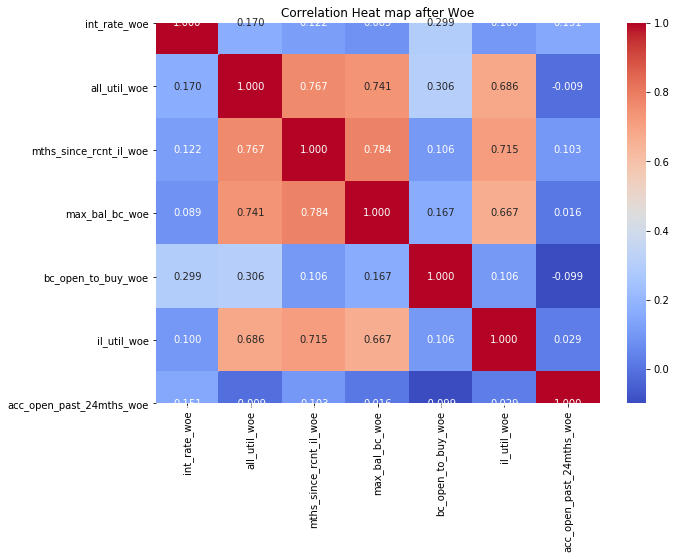

In [0]:
plt.figure(figsize=(10,7))
sns.heatmap(train_woe[a.variable.values].corr(), cmap= 'coolwarm',linecolor='black', annot=True, annot_kws={'size':10}, fmt=".3f", square=True)
plt.title("Correlation Heat map after Woe")

In [0]:
# Selecting the variables which WoE is less than 0.07 to drop them.
columns = iv[iv.info_value < 0.07].variable
c_no_woe = []
c = []
for i in columns:
  c.append(i)
  c_no_woe.append(i[:-4])

Eliminating the variables where IV is less tha  0.07

In [0]:
train_woe.drop(c, axis=1, inplace=True)


In [0]:
test_woe.drop(c, axis=1, inplace=True)

Eliminating the variable of the train and test data and saving the files to use them in the next python notebook.

In [0]:
train.drop(c_no_woe, axis=1, inplace=True )
test.drop(c_no_woe, axis=1, inplace=True )

In [0]:
train_woe.to_csv("train_woe.csv", index=False)
test_woe.to_csv("test_woe.csv", index=False)

In [0]:
train.to_csv("train_nowoe.csv", index=False)
test.to_csv("test_nowoe.csv", index=False)

In [0]:
# Final breaks
breaks_adj = {
    'all_util': [4,40,60],
    'bc_open_to_buy': [4000,10000,18000,29000],
    'int_rate': [12,15,17],
    'mths_since_rcnt_il': [1.0,7.0,15.0],
    'il_util': [1,60,80],
    'acc_open_past_24mths': [2.0,4.0,7.0],
    'max_bal_bc': [500.0,6500.0]

}